<a href="https://colab.research.google.com/github/hiu04/Data-Science/blob/main/A1_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Descriptive Statistics and Probability Theory


*Author: Xiaoyu Ma*

*Date: May 23 2023*

**Scenario**


You are a data analyst at an e-commerce company that sells a variety of products. Your company wants to better understand how various products perform across regions, in order to devise its sales strategy for next year.

You have been provided with data includes information about the product, the region where the product was sold, the price of the product, the number of units sold, and the date of the sale.

Your task is to clean the data as you see fit, and conduct exploratory analysis which will help the company build a sales strategy for the following year.

In addition to the analysis, be sure to answer the following questions:

1) What conclusions can you draw about sales performance of various products and regions?

2) What recommendations do you have for the business?

3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

## Load data and packages

In [ ]:
# Packages
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [ ]:
# Glimpse the original data
df = pd.read_csv("/content/sales_data.csv")
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05
...,...,...,...,...,...
1045,Product_42,Region_3,18.63,9.0,2023-07-10
1046,Product_4,Region_3,159.27,10.0,2024-07-14
1047,Product_43,Region_1,2.91,13.0,2023-08-17
1048,Product_27,Region_7,1.96,8.0,2024-03-10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


There are two categorical variables (Product and Region), two numerical variables (Price and Units Sold), and on date variable (Sale Date). It also shows that there are 1050 observations. However, there are some missing values in the dataset. For instance, there are approximate 100 missing values for vairable Product and data manipulation may be needed in this case.

In [ ]:
df.describe()

,Price,Units Sold
count,945.000000,943.000000
mean,108.628011,10.200424
std,167.350086,3.247589
min,0.190000,2.000000
25%,26.420000,8.000000
50%,64.640000,10.000000
75%,142.310000,12.000000
max,2636.900000,22.000000




1. The mean price of products is 108.63 while the median is only 64.64. The distribution of "Price" would be skewed, which will be demostrated in the histogram. The table also indicates that half of the product prices concentrate from 26.42 to 142.31. 

2. The mean and median units sold are both 10, which shows that the distribution is not skewed. The minimum unists sold is 2 while the largest number of sold units is 22. In addition, half of the observations have units sold from 8 to 12.




## Data Manipulation

Since we are interested in the sales performance, we first combine two numerical variables Price and Units Sold, called sales. Notice that there are some missing values for this two variable, we decide to replace the null values with median values. The reason why to choose median for variable Price is the skewness of the distribution due to the an extreme high price.

In [ ]:
# Replace null with median price for variable Price
df["Price"] = df["Price"].fillna(df["Price"].median())

In [ ]:
# Similar for variable Units Sold
df["Units Sold"] = df["Units Sold"].fillna(df["Units Sold"].median())

In [ ]:
# Create a new variable Sales = Price * Units Sold
df["Sales"] = df["Price"] * df["Units Sold"]

In [ ]:
df.describe()

,Price,Units Sold,Sales
count,1050.000000,1050.000000,1050.000000
mean,104.229210,10.180000,1080.845010
std,159.301875,3.078103,2041.480644
min,0.190000,2.000000,1.750000
25%,30.267500,8.000000,280.922500
50%,64.640000,10.000000,639.350000
75%,130.352500,12.000000,1280.347500
max,2636.900000,22.000000,38169.000000


Missing values in the dataset are dropped after replacing the median values of the sales because Sales is the response variable.

In [ ]:
# Drop null and update
df = df.dropna()

Outliers have sales greater than 10000 are also dropped since they are not representative of the sales performance.

In [ ]:
# Find outliers
df[df["Sales"] > 10000]

,Product,Region,Price,Units Sold,Sale Date,Sales
269,Product_49,Region_8,1296.0,14.0,2022-09-27,18144.0
407,Product_27,Region_7,1793.9,9.0,2023-02-12,16145.1
421,Product_34,Region_2,2636.9,14.0,2023-02-26,36916.6


In [ ]:
# Drop and update
df = df.drop([269,407,421])

In [ ]:
# View the data again and check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848 entries, 1 to 1048
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     848 non-null    object 
 1   Region      848 non-null    object 
 2   Price       848 non-null    float64
 3   Units Sold  848 non-null    float64
 4   Sale Date   848 non-null    object 
 5   Sales       848 non-null    float64
dtypes: float64(3), object(3)
memory usage: 46.4+ KB


In [ ]:
df.describe(include = "all")

,Product,Region,Price,Units Sold,Sale Date,Sales
count,848,848,848.000000,848.000000,848,848.000000
unique,50,10,NaN,NaN,807,NaN
top,Product_4,Region_5,NaN,NaN,2022-01-02,NaN
freq,28,100,NaN,NaN,2,NaN
mean,NaN,NaN,95.142559,10.224057,NaN,974.223243
std,NaN,NaN,94.183822,3.117803,NaN,1041.056714
min,NaN,NaN,0.190000,2.000000,NaN,1.750000
25%,NaN,NaN,31.617500,8.000000,NaN,296.320000
50%,NaN,NaN,64.640000,10.000000,NaN,636.810000
75%,NaN,NaN,125.582500,12.000000,NaN,1261.590000


Now, there are only 848 observations in the dataset and 6 variables. 

## Data Visualization

The following discussions would focus on statistics of frequency and median. The reaosn why the median is chosen is the right-skewed distrbution of sales performance so median of sales would be more representative of the whole data.

* Product vs. Sales

In [ ]:
# df1 = df.groupby("Region", group_keys=True).apply(lambda x: x)[['Product','Price','Units Sold','Sales']]
# df1

In [ ]:
df1 = df.loc[:, ['Region', 'Product', 'Price', 'Units Sold', 'Sales']]
df1.groupby(['Region','Product']).median()

* Individual

In [ ]:
# Products with the fewest sales record with meidan of sales value
df.groupby(df["Product"])["Sales"].describe().sort_values("count")[["count","50%"]].head()

,count,50%
Product,,
Product_47,10.0,598.900
Product_39,10.0,786.240
Product_18,11.0,1272.360
Product_14,12.0,629.275
Product_11,12.0,889.505


In [ ]:
# # Products with the most sales record with meidan of sales value
df.groupby(df["Product"])["Sales"].describe().sort_values("count")[["count","50%"]].tail()

,count,50%
Product,,
Product_50,23.0,1203.520
Product_8,24.0,442.345
Product_43,25.0,581.760
Product_24,27.0,502.460
Product_4,28.0,579.480


Product_47 and Product_39 are the least popular products with only 10 purchase respectively while product_4 is the most famous one with 28 purchase, followed by Product_24 with 27 sales.

In [ ]:
# Products with lowest median sales value
df.groupby(df['Product'])['Sales'].describe().sort_values('50%')[['count','50%']].head()

,count,50%
Product,,
Product_31,15.0,338.310
Product_25,13.0,359.600
Product_2,15.0,359.940
Product_3,20.0,375.455
Product_48,16.0,379.315


In [ ]:
# Products with greatest median sales value
df.groupby(df['Product'])['Sales'].describe().sort_values('50%')[['count','50%']].tail()

,count,50%
Product,,
Product_34,16.0,931.65
Product_23,21.0,975.92
Product_19,20.0,1022.64
Product_50,23.0,1203.52
Product_18,11.0,1272.36


Product_31 has the lowest median sales price with only 338.31, followed by Product_25 and Product_2 have median sales around 360. The maximum median sales is 1272 from Product_18.

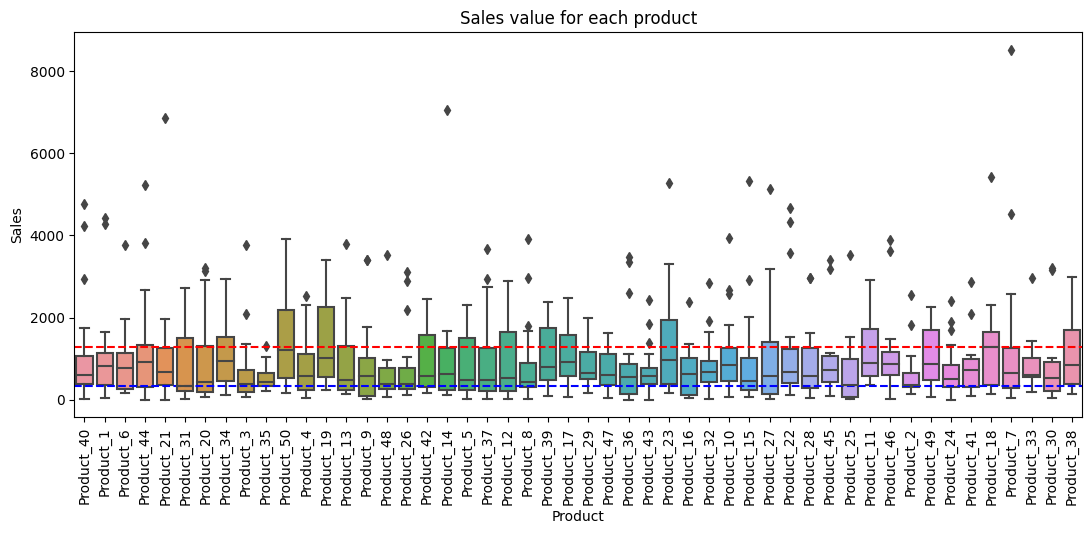

In [95]:
# Product vs. Sales
from matplotlib import pyplot as plt
plt.figure(figsize=(13,5))

plot1 = sns.boxplot(x = "Product",
                    y = "Sales",
                    data = df)
plot1.tick_params(axis='x', rotation=90)
plt.title("Sales value for each product")
plt.axhline(y= df.groupby(df['Product'])['Sales'].median().max(),
             color = "red", linestyle = "dashed")
plt.axhline(y= df.groupby(df['Product'])['Sales'].median().min(),
             color = "blue", linestyle = "dashed")

The boxplots indicating the sales performance on different products, the graph shows Product_18 has the greatest median sales value. Product_19, 50 and Product_23 have high sales value as well, which aligns the results from table above. The plot also tells Product_18 has the lowest sales value. From another aspect, Product_50, 19, 23, 27 have greater range of sales price compared to other products. In addition, there are some extreme high sales value for product 7, 14 and 21.

* Region vs. Sales

In [ ]:
df.groupby(df["Region"])["Sales"].describe().sort_values("count")[["count","mean","50%"]].transpose()

In [ ]:
# Sort from least sales region to greatest sales region
df.groupby("Region")['Sales'].describe().sort_values('50%')['50%']

In [ ]:
# Region vs. Sales
plt.figure(figsize=(6,5))

plot1 = sns.boxplot(x = "Region",
                    y = "Sales",
                    data = df)
plot1.tick_params(axis='x', rotation=45)
plt.title("Sales value for each region")
plt.axhline(y= df.groupby(df['Region'])['Sales'].median().max(),
             color = "#4A7DED", linestyle = "dashed")
plt.axhline(y= df.groupby(df['Region'])['Sales'].median().min(),
             color = "#4FED4A", linestyle = "dashed")

The highest sales values take place in Region 8 and 6. Region 7, 4 have the wrost sales performance oppositely.

* (Region & Product) vs. Sales

In [ ]:
region = df1['Region'].unique()
region = region.tolist()
region

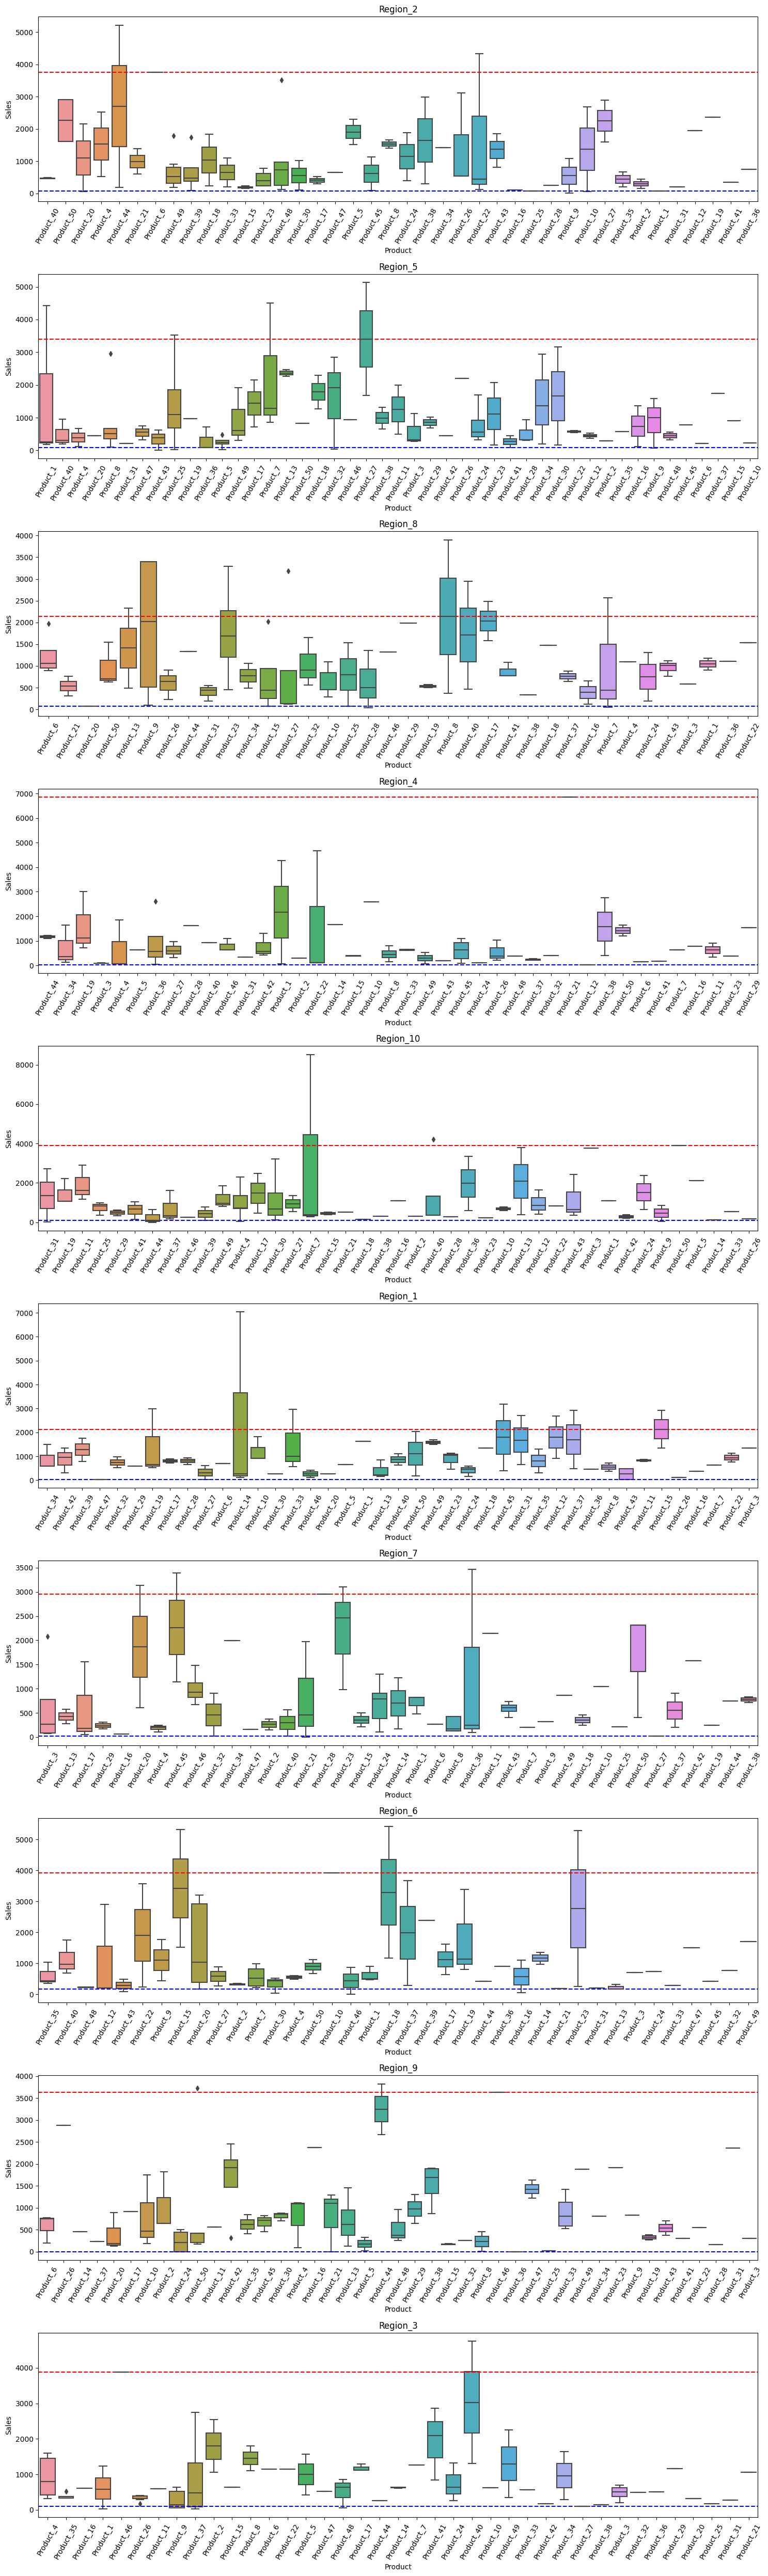

In [257]:
fig, ax = plt.subplots(10,1, figsize=(15,50))

for i in range(len(region)):
  data = df1[df1['Region'] == (region[i])]
  plot = sns.boxplot(ax = ax[i],
            x = "Product",
            y = "Sales",
            data = data)
  ax[i].tick_params(axis='x', rotation=60)
  ax[i].set_title(region[i])
  ax[i].axhline(y= df.groupby(data['Product'])['Sales'].median().max(), color = "red", linestyle = "dashed")
  ax[i].axhline(y= df.groupby(data['Product'])['Sales'].median().min(), color = "blue", linestyle = "dashed")
fig.tight_layout()